# Большагин Вячеслав РИС-22-1

# Анализ данных на Python

*Алла Тамбовцева*

## Домашнее задание №1

Всего за задание можно получить 40 баллов:

* часть 1 весит 30 баллов;
* часть 2 весит 10 баллов.

В качестве решения необходимо загрузить ipynb-файл с добавленным кодом (и ответами на вопросы, где требуется текстовый ответ или интерпретация результатов) на Dropbox. Ответы на вопросы без приведённого и корректно работающего кода Python не засчитываются. 

В части 1 предполагается использование методов на последовательностях/датафреймах Pandas и массивах NumPy. Неэффективный код с избыточными конструкциями или привлечением сторонних модулей, без которых можно обойтись, будет штрафоваться. Почти все задачи решаются с помощью методов, обсуждаемых на занятиях или присутствующих явно в основных материалах курса; в противном случае в условиях задач дана подсказка с названием нужного метода или функции.

В части 2 предполагается работа с текстами и построение облаков слов по алгоритму, рассмотренному в материалах недели 4* (запись дополнительного асинхронного занятия и конспект).

## Часть 1: о материальном (30 баллов)

В этой части вам предлагается поработать с данными о заказах пиццы, сохранёнными в файлах [orders.csv](https://raw.githubusercontent.com/allatambov/PyPerm24/main/orders.csv) и [order_details.csv](https://raw.githubusercontent.com/allatambov/PyPerm24/main/order_details.csv).

В файле `orders.csv` хранится общая информация о заказах пиццы:

* `order_id`: id заказа;
* `date`: дата заказа;
* `time`: время заказа.

В файле `order_details.csv` хранится более подробная информация о заказах пиццы:

* `order_details_id`: id записи (одной пиццы в заказе);
* `order_id`: id заказа;
* `pizza_id`: id пиццы, состоит из её названия (с `_` вместо пробелов) и её размера (`L/M/S/XL/XXL`, после последнего `_`);
* `quantity`: число пицц с данным id в заказе.

### Задача 1 (1 балл)

Загрузите данные из файлов `orders.csv` и `order_details.csv` и сохраните их в датафреймы Pandas. Объедините данные по столбцу `order_id` и сохраните итоговый датафрейм в переменную `full`. 

**Подсказка:** метод `.merge()`.

In [28]:
import pandas as pd
import numpy as np

In [29]:
orders_df = pd.read_csv(
    'https://raw.githubusercontent.com/allatambov/PyPerm24/main/orders.csv')
orders_det_df = pd.read_csv(
    'https://raw.githubusercontent.com/allatambov/PyPerm24/main/order_details.csv')
full = pd.merge(orders_df, orders_det_df, on='order_id')
full.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity
46468,20408,2015-12-13,13:47:48,46469,spinach_supr_m,1
41389,18223,2015-11-07,13:07:13,41390,cali_ckn_m,1
6600,2919,2015-02-18,17:07:38,6601,southw_ckn_l,1
36221,15992,2015-09-26,21:48:40,36222,veggie_veg_l,1
19666,8647,2015-05-25,13:13:12,19667,mediterraneo_m,1


### Задача 2 (3 балла)

Добавьте в датафрейм `full`:

* столбец `pizza_size` с размером пиццы заглавными буквами (значения из `pizza_id` после последнего `_`);
* столбец `pizza_type` с названием пиццы без указания её размера (значения из `pizza_id` до `_m`, `_l` и проч).

Примеры значений для первых трёх заказов:

* название `hawaiian` и размер `M`;
* название `classic_dlx` и размер `M`;
* название `five_cheese` и размер `L`.

**Подсказка:** если уверенно владеете регулярными выражениями, можно обратить внимание на метод `str.extract()` и поиск по группам (но и без регулярных выражений эту задачу точно можно выполнить).

In [30]:
full['pizza_size'] = full['pizza_id'].str.split('_').str[-1].str.upper()
full['pizza_type'] = full['pizza_id'].str.split('_').str[:-1].str.join('_')

'''
Либо можно через лямбда-функции
full['pizza_size'] = full['pizza_id'].apply(lambda x: x.split('_')[-1].upper())
full['pizza_type'] = full['pizza_id'].apply(lambda x: '_'.join(x.split('_')[:-1]))
'''

full.head(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_size,pizza_type
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,M,hawaiian
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,M,classic_dlx
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,L,five_cheese
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,L,ital_supr
4,2,2015-01-01,11:57:40,5,mexicana_m,1,M,mexicana


### Задача 3 (1 балл)

Выведите таблицы частот для столбцов `pizza_size` и `pizza_type`. Пиццы какого размера заказывают чаще всего? Пиццы какого типа заказывают чаще всего?

In [31]:
full['pizza_type'].value_counts().head(5)

pizza_type
classic_dlx    2416
bbq_ckn        2372
hawaiian       2370
pepperoni      2369
thai_ckn       2315
Name: count, dtype: int64

In [32]:
full['pizza_size'].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

Хотя в целом скорее всего честнее будет считать с учетом quantity, так как один заказ может включать много пицц, например, одной размера, и для заведения это в любом случае будет означать выскоий спрос именно на данный размер пиццы.
Т.е. если есть 4 заказа по 1 пицце размера S и 1 заказ по 10 пицц размера L, то для бизнеса правильнее будет сказать, что пицца L востребованне (например, потому что она более выгодная и стоит выровнять ценовую политику)
В следующих заданиях буду придерживаться этой же логики, если не оговорено иначе

In [33]:
full[['pizza_type', 'quantity']].groupby('pizza_type').sum().sort_values(
    by='quantity', ascending=False).head(5)

,quantity
pizza_type,
classic_dlx,2453
bbq_ckn,2432
hawaiian,2422
pepperoni,2418
thai_ckn,2371


In [34]:
full[['pizza_size', 'quantity']].groupby('pizza_size').sum().sort_values(
    by='quantity', ascending=False)

,quantity
pizza_size,
L,18956
M,15635
S,14403
XL,552
XXL,28


**ОТВЕТ**: Как видно, чаще всего заказывают пиццы размера L и классического типа

### Задача 4 (3 балла)

Сгруппируйте все строки в `full` по id заказа и определите:

* минимальное число пицц в заказе;
* максимальное число пицц в заказе;
* среднее число пицц в заказе;
* медианное число пицц в заказе.

Формат выдачи результата – свободный, при решении нужно пользоваться методами на объектах pandas. Ответьте на следующие вопросы.

* Чему равно минимальное и максимальное число пицц в заказе?
* Можно ли на основании посчитанных описательных статистик считать, что в выборке значений числа пицц в заказе присутствуют нехарактерные значения? Если да, то это нехарактерно большие или нехарактерно маленькие значения? Обоснуйте свой ответ.

In [35]:

grouped = full[['order_id', 'quantity']].groupby(['order_id']).sum()
print('Минимальное число пицц в заказе: ', grouped.min().iloc[0])
print('Максимальное число пицц в заказе:', grouped.max().iloc[0])
print('Среднее число пицц в заказе:     ', grouped.mean().iloc[0])
print('Медианное число пицц в заказе:   ', grouped.median().iloc[0])
grouped

Минимальное число пицц в заказе:  1
Максимальное число пицц в заказе: 28
Среднее число пицц в заказе:      2.321967213114754
Медианное число пицц в заказе:    2.0


,quantity
order_id,
1,1
2,5
3,2
4,1
5,1
...,...
21346,4
21347,4
21348,3


**ОТВЕТ** Судя по всему основные данные сосредоточены вокруг маленьких значений, тогда как есть выбросы больших. 
Минимум - 1, максимум - 28

### Задача 5 (3 балла)

Сохраните значения *общего числа пицц в заказе* в массив `order_n` (число элементов в массиве должно равняться числу заказов). Определите границы характерных значений и:

* вычислите число нехарактерных значений в выборке;
* зафиксируйте минимальное и максимальное нехарактерное значение в выборке.

Приведите код и текстовые ответы на эти два пункта.

In [36]:
order_n = grouped['quantity'].to_numpy()
# Выбросы буду характеризовать через то, как построен боксплот
iqr = np.subtract(*np.percentile(order_n, [75, 25]))
max_norm, min_norm = np.percentile(order_n, 75) + 1.5 * iqr, np.percentile(
    order_n, 25) - 1.5 * iqr
print('Верхняя и нижняя границы "нормальных" значений:', max_norm, min_norm)
not_norm = order_n[(order_n > max_norm) | (order_n < min_norm)]
print('Количество выбросов: ', len(not_norm))
print(
    f'Минимальный выброс: {min(not_norm)}, Максимальный выброс: {max(not_norm)}')

Верхняя и нижняя границы "нормальных" значений: 6.0 -2.0
Количество выбросов:  533
Минимальный выброс: 7, Максимальный выброс: 28


**ОТВЕТ** Количество выбросов:  533
Минимальный выброс: 7, Максимальный выброс: 28

### Задача 6 (1 балл)

Постройте ящик с усами для массива `order_n`. Прокомментируйте полученные результаты: форму распределения (симметрично/скошено), наличие выбросов, значения квартилей).

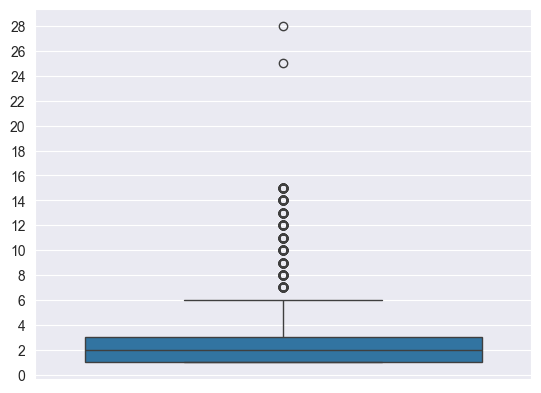

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(order_n)
plt.locator_params(axis='y', nbins=28)

**ОТВЕТ** форма нессиметричная, как и было видно ранее смещена к небольшим значениям. Все выбросы располагаются сверху, начиная с 7. Медиана (квантиль 50) равна 2, Квантиль 25 = 1, квантиль 75 = 3

### Задача 7 (3 балла)

Выберите строки датафрейма, которые соответствуют пиццам с куриным мясом (содержат `ckn` в названии). Определите и запишите в ответ:

* число таких пицц;
* число заказов, включающих такие пиццы.

Выведите (в свободной форме) перечень уникальных названий пицц, содержащих куриное мясо в качестве ингредиента.

In [38]:
chicken_pizzas = full[['order_id', 'pizza_type']][
    full['pizza_type'].str.contains('ckn')]
chicken_pizzas

,order_id,pizza_type
5,2,thai_ckn
10,6,bbq_ckn
24,10,southw_ckn
25,11,bbq_ckn
26,11,cali_ckn
...,...,...
48609,21346,cali_ckn
48611,21347,bbq_ckn
48614,21347,southw_ckn
48615,21348,ckn_alfredo


In [39]:
print(f'Пицц с курицей:    {chicken_pizzas["pizza_type"].nunique()}')
print(f'Заказов с курицей: {chicken_pizzas["order_id"].nunique()}')
print('Пиццы с курицей:', ', '.join(chicken_pizzas['pizza_type'].unique()))

Пицц с курицей:    6
Заказов с курицей: 8536
Пиццы с курицей: thai_ckn, bbq_ckn, southw_ckn, cali_ckn, ckn_pesto, ckn_alfredo


**ОТВЕТ** Пицц с курицей: 6, Заказов с курицей: 8536

### Задача 8 (1 балл)

Перезапишите столбец `date` таким образом, чтобы в нём даты были сохранены в формате *дата-время* (например, `datetime64[ns]`). Формат даты менять не нужно, на первом месте должен стоять год, на втором – месяц, на третьем – день. 

In [40]:
full['date'] = pd.to_datetime(full['date'])
full.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_size,pizza_type
10862,4756,2015-03-21,16:51:43,10863,five_cheese_l,1,L,five_cheese
43045,18922,2015-11-19,17:39:58,43046,ital_supr_m,1,M,ital_supr
2935,1294,2015-01-22,17:43:01,2936,ital_veggie_l,1,L,ital_veggie
25468,11207,2015-07-06,18:18:11,25469,bbq_ckn_l,1,L,bbq_ckn
16225,7141,2015-04-30,17:06:02,16226,mexicana_l,1,L,mexicana


### Задача 9 (1 балл)

Используя обновлённый столбец `date`, создайте столбец `weekday` со значением дня недели (в полном формате, без сокращений).

In [41]:
full['weekday'] = full['date'].dt.day_name()

full.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_size,pizza_type,weekday
5159,2284,2015-02-07,19:35:53,5160,ital_cpcllo_s,1,S,ital_cpcllo,Saturday
28996,12795,2015-08-01,20:50:37,28997,cali_ckn_m,1,M,cali_ckn,Saturday
16188,7123,2015-04-30,13:22:57,16189,spinach_fet_s,1,S,spinach_fet,Thursday
33132,14644,2015-09-02,12:59:50,33133,big_meat_s,1,S,big_meat,Wednesday
39051,17215,2015-10-20,11:58:29,39052,brie_carre_s,1,S,brie_carre,Tuesday


### Задача 10 (1 балл)

Используя столбец `weekday`, добавьте бинарный столбец `weekend`, где значение 1 соответствует выходным дням (суббота, воскресенье), а значение 0 – будним дням.

In [42]:
full['weekend'] = full['weekday'].map(
    lambda x: int(x in ['Saturday', 'Sunday']))
full.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_size,pizza_type,weekday,weekend
7638,3363,2015-02-26,13:52:23,7639,spinach_supr_s,1,S,spinach_supr,Thursday,0
32580,14398,2015-08-28,20:25:07,32581,ital_cpcllo_l,1,L,ital_cpcllo,Friday,0
39791,17516,2015-10-24,22:10:33,39792,pepperoni_s,1,S,pepperoni,Saturday,1
3480,1542,2015-01-26,18:37:22,3481,thai_ckn_m,1,M,thai_ckn,Monday,0
35817,15817,2015-09-21,20:23:42,35818,peppr_salami_m,1,M,peppr_salami,Monday,0


### Задача 11 (3 балла)

Отфильтруйте строки, соответствующие заказам, сделанным в выходные дни, в датафрейм `vyh`, а строки, соответствующие заказам, сделанным в будние дни – в датафрейм `bud`. 

Можно ли считать, что:

* на выходные дни приходится больше заказов?
* в выходные дни, в среднем, заказы пицц больше (из большего числа пицц)?

Приведите код для ответов на эти вопросы и сами ответы на вопросы.

In [64]:
vyh = full[full['weekend'] == 1]
bud = full[full['weekend'] == 0]
print('Заказов в выходные:', len(vyh))
print('Заказов в будни:   ', len(bud))
print('Заказов в выходной в среднем:   ', len(vyh) / vyh['weekday'].nunique())
print('Заказов в будний день в среднем:', len(bud) / bud['weekday'].nunique())
# В целом это можно и без группировки, просто сделав сумма_заказов/кол-во заказов, но для разнообразия сделал через группировку (хотя может быть решение без группировки будет быстрее)
vyh_mean = \
    vyh[['order_id', 'quantity']].groupby(['order_id']).sum().mean().iloc[0]
bud_mean = \
    bud[['order_id', 'quantity']].groupby(['order_id']).sum().mean().iloc[0]
print(f'Средний размер заказа в выходные: {round(vyh_mean, 3)}')
print(f'Средний размер заказа в будни:    {round(bud_mean, 3)}')

Заказов в выходные: 13272
Заказов в будни:    35348
Заказов в выходной в среднем:    6636.0
Заказов в будний день в среднем: 7069.6
Средний размер заказа в выходные: 2.34
Средний размер заказа в будни:    2.315


**ОТВЕТ** На будни и в сумме, и в среднем приходится больше заказов, чем в выходные. Зато в выходные в среднем в заказе больше пицц 

### Задача 12 (2 балла)

* Определите, используя датафреймы `vyh` и `bud`, какую пиццу (с какой начинкой) заказывают чаще всего в выходные и будни. 

* Определите, используя датафреймы `vyh` и `bud`, пиццу какого размера заказывают чаще всего в выходные и будни. 

In [44]:
# Буду считать топ пицц с учетом количества пиццы в заказе, чтобы учитывать что одну пиццу могли заказать сразу в большом количестве для большой компании
print('Топ пицца в выходные:',
      vyh[['pizza_type', 'quantity']].groupby(['pizza_type']).sum().sort_values(
          by='quantity', ascending=False).index[0])
print('Топ пицца в будни:   ',
      bud[['pizza_type', 'quantity']].groupby(['pizza_type']).sum().sort_values(
          by='quantity', ascending=False).index[0])
print('Топ размер в выходные:',
      vyh[['pizza_size', 'quantity']].groupby(['pizza_size']).sum().sort_values(
          by='quantity', ascending=False).index[0])
print('Топ размер в будни:   ',
      bud[['pizza_size', 'quantity']].groupby(['pizza_size']).sum().sort_values(
          by='quantity', ascending=False).index[0])

Топ пицца в выходные: pepperoni
Топ пицца в будни:    classic_dlx
Топ размер в выходные: L
Топ размер в будни:    L


**ОТВЕТ** Топ пицца в выходные: pepperoni
Топ пицца в будни:    classic_dlx
Топ размер в выходные: L
Топ размер в будни:    L

### Задача 13 (2 балла)

Постройте таблицу сопряжённости для столбцов `pizza_type` и `weekday` и сохраните её в переменную `tab`. Используя `tab`, ответьте на следующие вопросы.

* В какой день недели чаще заказывают пиццу «четыре сыра» (`four_cheese`)?
* В какой день недели чаще заказывают греческую пиццу (`the_greek`)?

**Подсказка:** функция `pd.crosstab()` для таблицы сопряжённости.

In [71]:
tab = pd.crosstab(full['pizza_type'], full['weekday'], values=full['quantity'],
                  aggfunc='sum')
tab

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pizza_type,,,,,,,
bbq_ckn,400,345,379,298,368,318,324
big_meat,306,252,303,258,271,261,263
brie_carre,71,67,62,80,74,68,68
calabrese,131,129,145,117,153,126,136
cali_ckn,396,321,352,291,356,334,320
ckn_alfredo,151,146,168,114,140,124,144
ckn_pesto,178,125,142,125,136,124,143
classic_dlx,410,328,366,277,376,350,346
five_cheese,265,176,205,163,204,208,188


In [72]:
print('Топ день для четыре сыра:',
      tab.loc['four_cheese'].sort_values(ascending=False).index[0])
print('Топ день для греческой:  ',
      tab.loc['the_greek'].sort_values(ascending=False).index[0])

Топ день для четыре сыра: Thursday
Топ день для греческой:   Friday


**ОТВЕТ** Топ день для четыре сыра: Четверг
Топ день для греческой:   Пятница и воскресенье (как видно из таблицы)

### Задача 14 (3 балла)

Добавьте в датафрейм `full` столбец `daypart` из следующих значений:

* `"night"`: если время заказа с 00:00:00 до 04:59:59;
* `"morning"`: если время заказа с 05:00:00 до 11:59:59;
* `"afternoon"`: если время заказа с 12:00:00 до 17:59:59;
* `"evening"`: если время заказа с 18:00:00 до 23:59:59.

In [47]:
def to_daypart(time):
    hours = int(time.split(':')[0])
    if 0 <= hours < 5:
        return 'night'
    if 5 <= hours < 12:
        return 'morning'
    if 12 <= hours < 18:
        return 'afternoon'
    return 'evening'


full['daypart'] = full['time'].apply(lambda x: to_daypart(x))
full.sample(10)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_size,pizza_type,weekday,weekend,daypart
25399,11175,2015-07-06,12:42:44,25400,spicy_ital_l,1,L,spicy_ital,Monday,0,afternoon
33562,14817,2015-09-05,13:42:31,33563,southw_ckn_l,1,L,southw_ckn,Saturday,1,afternoon
6653,2939,2015-02-18,20:08:11,6654,bbq_ckn_m,1,M,bbq_ckn,Wednesday,0,evening
42491,18694,2015-11-15,13:11:29,42492,bbq_ckn_l,1,L,bbq_ckn,Sunday,1,afternoon
22108,9712,2015-06-12,15:17:32,22109,soppressata_l,1,L,soppressata,Friday,0,afternoon
47912,21062,2015-12-24,12:57:52,47913,mediterraneo_l,1,L,mediterraneo,Thursday,0,afternoon
9002,3943,2015-03-08,12:37:23,9003,ckn_alfredo_m,1,M,ckn_alfredo,Sunday,1,afternoon
1020,443,2015-01-08,12:34:20,1021,cali_ckn_m,2,M,cali_ckn,Thursday,0,afternoon
37371,16499,2015-10-06,12:53:29,37372,pep_msh_pep_l,1,L,pep_msh_pep,Tuesday,0,afternoon
20311,8922,2015-05-30,13:33:49,20312,ital_supr_s,1,S,ital_supr,Saturday,1,afternoon


### Задача 15 (2 балла)

Определите, в какую часть дня (на основе столбца `daypart`):

* чаще всего заказывают пиццы;
* заказывают пиццы самого большого размера.

In [48]:
full

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_size,pizza_type,weekday,weekend,daypart
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,M,hawaiian,Thursday,0,morning
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,M,classic_dlx,Thursday,0,morning
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,L,five_cheese,Thursday,0,morning
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,L,ital_supr,Thursday,0,morning
4,2,2015-01-01,11:57:40,5,mexicana_m,1,M,mexicana,Thursday,0,morning
...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,M,ckn_alfredo,Thursday,0,evening
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,L,four_cheese,Thursday,0,evening
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,S,napolitana,Thursday,0,evening
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,L,mexicana,Thursday,0,evening


In [92]:
# Здесь без группировки, так как важно просто количество самих заказов
print('Чаще всего заказывают в', full['daypart'].value_counts().index[0])
# А здесь с учетом позиций в заказе, чтобы учесть спрос на конкретные размеры
print('Чаще всего заказывают L пиццы в',
      full[full['pizza_size'] == 'L'][['daypart', 'quantity']].groupby(
          'daypart').sum().sort_values(by='quantity', ascending=False).index[0])

Чаще всего заказывают в afternoon
Чаще всего заказывают L пиццы в afternoon


**ОТВЕТ** Оба вида чаще всего заказывают вечером

## Часть 2: о духовном (10 баллов)

В этой задаче предлагается по алгоритму, предложенному в неделе 4*, обработать тексты и построить облака слов. При желании алгоритм можно доработать, например, расширить/изменить список стоп-слов. Задача творческая, автоматических тестов нет.

В папке `Songs` (скачать можно [здесь](https://www.dropbox.com/scl/fi/s5d8rr90keh1u3v67tx7x/Songs.zip?rlkey=qetflwgywc24j0ay6993vliwh&st=79hauqci&dl=0), одним архивом) в файлах с расширением `.txt` сохранены тексты песен Владимира Высоцкого:

* файлы, названия которых начинаются с `01`, содержат песни на сказочную/мифологическую тематику;
* файлы, названия которых начинаются с `02`, содержат шуточные песни.

Напишите программу, которая:

* считывает тексты из всех файлов; песни на сказочную тематику склеивает в строку `tales`, а шуточные песни – в строку `jokes`;
* приводит строки `tales` и `jokes` к нижнему регистру, убирает все знаки препинания, приводит все слова к начальной форме;
* строит по обработанным текстам в `tales` и `jokes` облака слов, отдельное облако для `tales` и отдельное облако для `jokes` (2 балла за простые облака без своей маски – см. ниже).

Каждое облако должно быть построено на основе **какого-нибудь векторного изображения**, взятого в качестве маски, при этом изображения для каждого облака должны быть разные. Так, например, облако для `tales` можно построить в форме избушки на курьих ножках, а облако для `jokes` – в форме телевизора. 

Поработайте с полученными облаками слов – измените цветовую палитру или цвет фона, скорректируйте размер картинки или количество слов при необходимости.

Любое творчество приветствуется!

Баллы за задачу:

- 2 балла: за загрузку текстов и получение строк `tales` и `jokes`;
- 1 балла: за приведение к нижнему регистру, удаление знаков пунктуации и приведение слов к начальной форме;
- 2 балла за простые облака слов без изображения-маски;
- 3 балла за облака слов с изображением-маской и дальнейшей доработкой в зависимости от вида облака.

In [93]:
import pathlib

songs = list(pathlib.Path('./Songs/').glob('*.txt'))
tales = ''
jokes = ''
for songs in songs:
    with open(songs, 'r', encoding='utf-8') as song_file:
        if songs.name.startswith('01'):
            tales += ' '.join(song_file.readlines()) + ' '
        else:
            jokes += ' '.join(song_file.readlines()) + ' '
tales[:1000]


'В Тридевятом государстве\n Трижды девять — двадцать семь\n Всё держалось на коварстве\n Без проблем и без систем\n Нет того, чтобы сам воевать!\n Стал король втихаря попивать\n Расплевался с королевой\n Дочь оставил старой девой\n А наследник пошёл воровать\n В Тридесятом королевстве\n Трижды десять — тридцать, что ль?\n В добром дружеском соседстве\n Жил ещё один король\n Тишь да гладь, да спокойствие там\n Хоть король был отъявленный хам\n Он прогнал министров с кресел\n Оппозицию повесил\n И скучал от тоски по делам\n В Триодиннадцатом царстве\n То бишь, в царстве тридцать три\n Царь держался на лекарстве\n Воспалились пузыри\n Был он милитарист и вандал\n Двух соседей зазря оскорблял\n Слал им каждую субботу\n Оскорбительную ноту\n Шёл на международный скандал\n Тридцать третьем царь сказился\n Не хватает, мол, земли\n На соседей покусился\n И взбесились короли\n Обуздать его, смять! — Только глядь\n Нечем в Двадцать седьмом воевать\n А в Тридцатом — полководцы\n Все утоплены в ко

In [94]:
%pip install nltk
%pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import re


def clean_text(text):
    text = text.lower().replace('\n', '')
    morph = MorphAnalyzer(lang='ru')
    stop_words = set(stopwords.words('russian'))
    # Оставляем только буквы
    text = re.sub('[^а-яёА-ЯЁ]', ' ', text)
    text_tokens = text.split(' ')
    cleaned_tokens = []
    for token in text_tokens:
        normal = morph.normal_forms(token)[0]
        if normal not in stop_words:
            cleaned_tokens.append(normal)
    return ' '.join(cleaned_tokens)

In [96]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
tales_cleaned = clean_text(tales)
jokes_cleaned = clean_text(jokes)

In [98]:
from wordcloud import WordCloud
from PIL import Image


def show_wordcloud(text, mask_path=None, colormap=None):
    mask = None
    if mask_path:
        mask = np.array(Image.open(mask_path))
        mask[mask == 0] = 255
    wordcloud = WordCloud(width=1200, height=1000, random_state=21,
                          max_font_size=210, mask=mask,
                          background_color='white', max_words=100, colormap=colormap).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Пока что строю без маски, ведь еще не видно особенности текстов

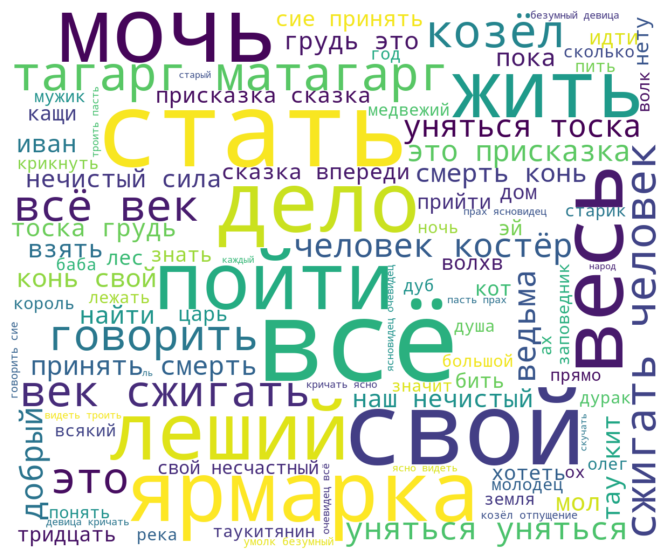

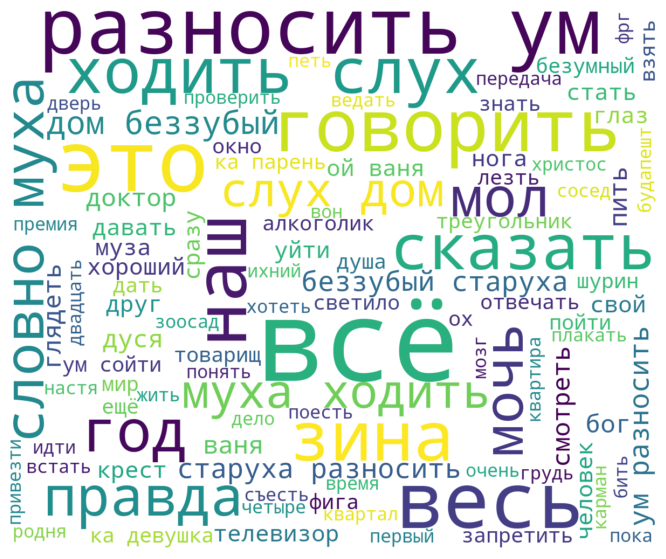

In [99]:
show_wordcloud(tales_cleaned)
show_wordcloud(jokes_cleaned)

В целом вот топ самых популярных языков в песнях, но на данный момент это почти никак не отражает отличие шуточных от сказочных песен, поэтому стоит обновить стоп-лист слов

In [100]:
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import re


def clean_text_v2(text):
    text = text.lower().replace('\n', '')
    morph = MorphAnalyzer(lang='ru')

    stop_words = set(stopwords.words('russian'))
    stop_words.update(
        ['то', 'всё', 'я', 'это', 'наш', 'свой', 'ну', 'весь', 'по', 'что',
         'там', 'а', 'и'])
    # оставляем только кириллицу
    text = re.sub('[^а-яёА-ЯЁ]', ' ', text)
    text_tokens = text.split(' ')
    cleaned_tokens = []
    for token in text_tokens:
        normal = morph.normal_forms(token)[0]
        if normal not in stop_words:
            cleaned_tokens.append(normal)
    return ' '.join(cleaned_tokens)

In [101]:
tales_cleaned_v2 = clean_text_v2(tales)
jokes_cleaned_v2 = clean_text_v2(jokes)

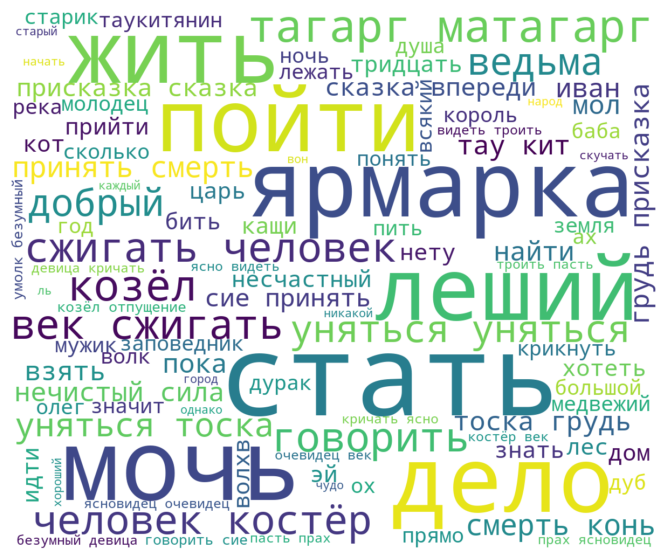

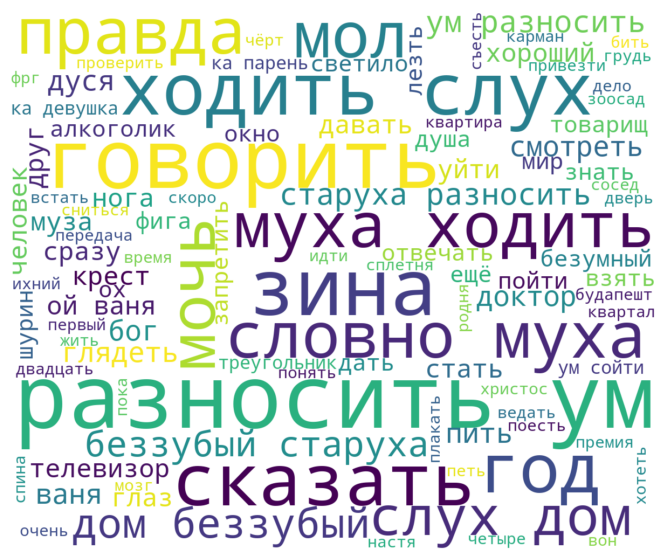

In [102]:
show_wordcloud(tales_cleaned_v2)
show_wordcloud(jokes_cleaned_v2)

Вот теперь слова выглядят интереснее, можно еще убрать некоторые популярные глаголы (как говорить, например), чтобы оставить больше уникальной лексики

In [103]:
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import re


def clean_text_v3(text):
    text = text.lower().replace('\n', '')
    morph = MorphAnalyzer(lang='ru')

    stop_words = set(stopwords.words('russian'))
    stop_words.update(
        ['то', 'всё', 'я', 'это', 'наш', 'свой', 'ну', 'весь', 'по', 'что',
         'там', 'а', 'и', 'говорить', 'стать', 'мочь', 'пойти'])
    # оставляем только кириллицу
    text = re.sub('[^а-яёА-ЯЁ]', ' ', text)
    text_tokens = text.split(' ')
    cleaned_tokens = []
    for token in text_tokens:
        normal = morph.normal_forms(token)[0]
        if normal not in stop_words:
            cleaned_tokens.append(normal)
    return ' '.join(cleaned_tokens)

In [104]:
tales_cleaned_v3 = clean_text_v3(tales)
jokes_cleaned_v3 = clean_text_v3(jokes)

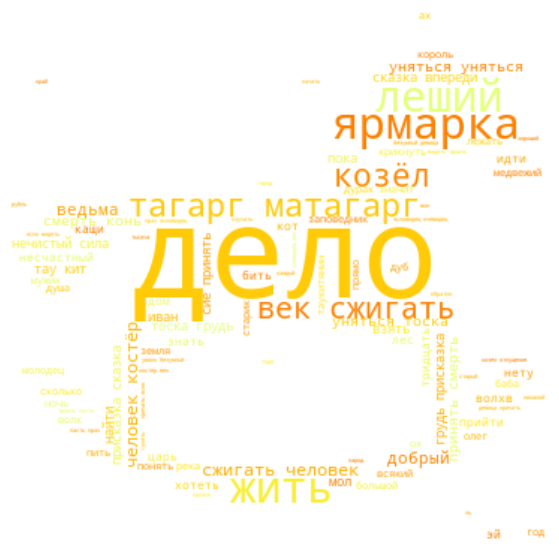

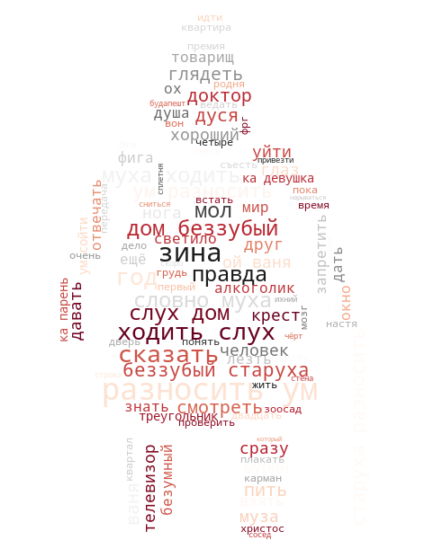

In [105]:
show_wordcloud(tales_cleaned_v3, 'horse.png', 'Wistia')
show_wordcloud(jokes_cleaned_v3, 'babka.png', 'RdGy')

Вот теперь передается атмосфера песен! И видна разница между ними